In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [127]:
import glob

path = '2019/Austraian_2019'  
csv_files = glob.glob(path + "/*.csv") # ALL csv in the folder

# List 
dfs = []

# Iterate through the list of files
for filename in csv_files:
    df = pd.read_csv(filename)
    dfs.append(df)

# Concatenate all the dataframes in the list into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)


print(combined_df.shape)

(1401, 38)


In [128]:
df = combined_df.drop(columns=['DeletedReason', 'PitInTime', 'PitOutTime'])

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                1401 non-null   object 
 1   Driver              1401 non-null   object 
 2   DriverNumber        1401 non-null   int64  
 3   LapTime             1401 non-null   object 
 4   LapNumber           1401 non-null   float64
 5   Stint               1401 non-null   float64
 6   Sector1Time         1380 non-null   object 
 7   Sector2Time         1400 non-null   object 
 8   Sector3Time         1401 non-null   object 
 9   Sector1SessionTime  1376 non-null   object 
 10  Sector2SessionTime  1400 non-null   object 
 11  Sector3SessionTime  1401 non-null   object 
 12  SpeedI1             1219 non-null   float64
 13  SpeedI2             1400 non-null   float64
 14  SpeedFL             1378 non-null   float64
 15  SpeedST             1399 non-null   float64
 16  IsPers

In [130]:
df['LapTime'] = pd.to_timedelta(df['LapTime'])

df['LapTime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1401 entries, 0 to 1400
Series name: LapTime
Non-Null Count  Dtype          
--------------  -----          
1401 non-null   timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 11.1 KB


<Axes: >

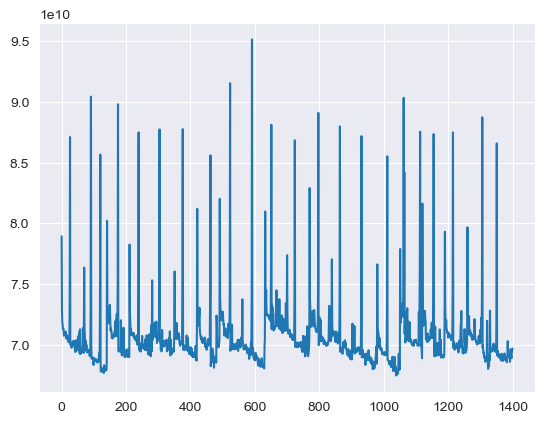

In [131]:
df['LapTime'].plot()

In [132]:
df.groupby(['TrackTemp'])['LapTime'].mean() #중요

TrackTemp
49.3   0 days 00:01:09.834487804
49.5   0 days 00:01:09.576923076
49.6   0 days 00:01:09.771746031
49.7   0 days 00:01:09.581989010
49.8      0 days 00:01:09.410520
49.9   0 days 00:01:09.369685714
50.0   0 days 00:01:09.862075757
50.1   0 days 00:01:09.514916666
50.2   0 days 00:01:09.949126760
50.3   0 days 00:01:09.976211678
50.4      0 days 00:01:09.932500
50.5   0 days 00:01:11.100043103
50.6   0 days 00:01:10.667656250
50.7   0 days 00:01:10.651686046
50.8      0 days 00:01:10.933790
50.9   0 days 00:01:11.226028571
51.0   0 days 00:01:11.535759615
51.1   0 days 00:01:11.249934210
51.2      0 days 00:01:14.637700
51.3   0 days 00:01:11.235296875
51.4   0 days 00:01:11.233903225
Name: LapTime, dtype: timedelta64[ns]

In [133]:
df.groupby(['TrackTemp'])['LapTime'].agg(['mean',"count"])

,mean,count
TrackTemp,,
49.3,0 days 00:01:09.834487804,41
49.5,0 days 00:01:09.576923076,39
49.6,0 days 00:01:09.771746031,63
49.7,0 days 00:01:09.581989010,91
49.8,0 days 00:01:09.410520,50
49.9,0 days 00:01:09.369685714,35
50.0,0 days 00:01:09.862075757,66
50.1,0 days 00:01:09.514916666,36
50.2,0 days 00:01:09.949126760,71


<Axes: xlabel='TrackTemp'>

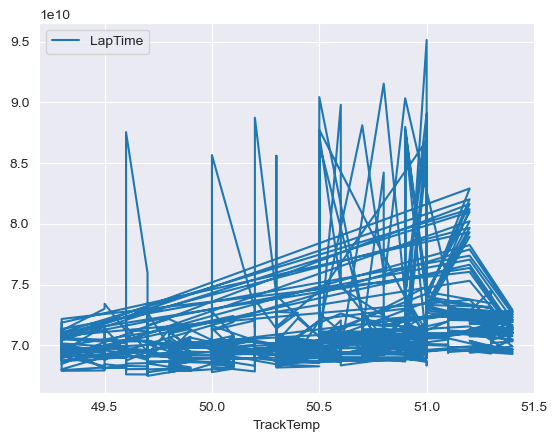

In [134]:
df.plot(x='TrackTemp', y='LapTime')

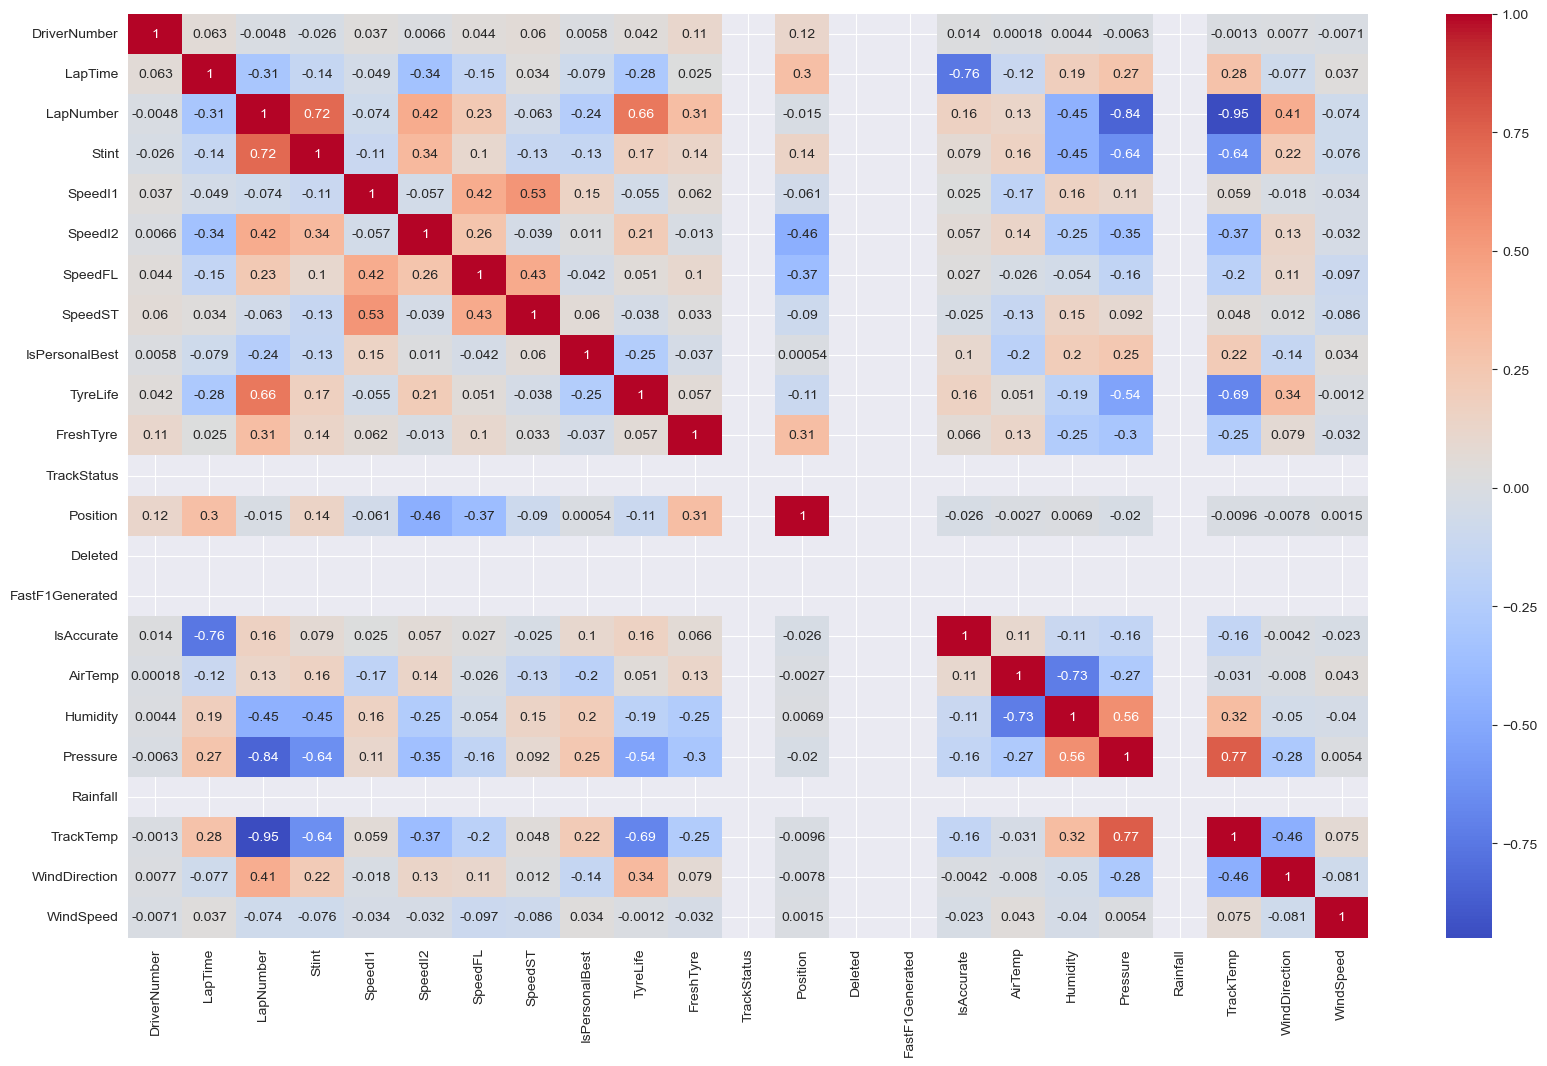

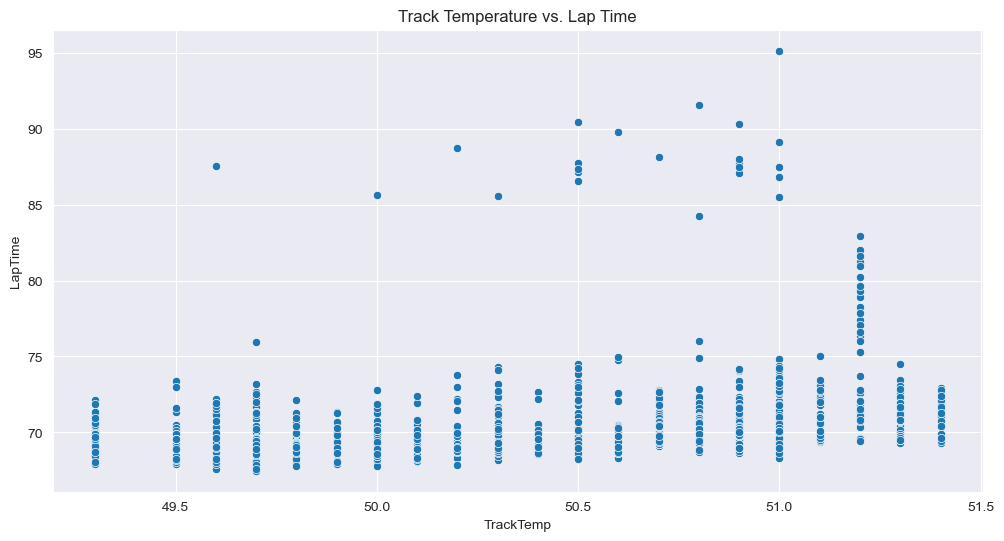

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df['LapTime'] = df['LapTime'].dt.total_seconds()


corr_matrix = df.corr(numeric_only=True)

# Heatmap to visualize correlations
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Scatter plot for Track Temperature vs. Lap Time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TrackTemp', y='LapTime', data=df)
plt.title('Track Temperature vs. Lap Time')
plt.show()



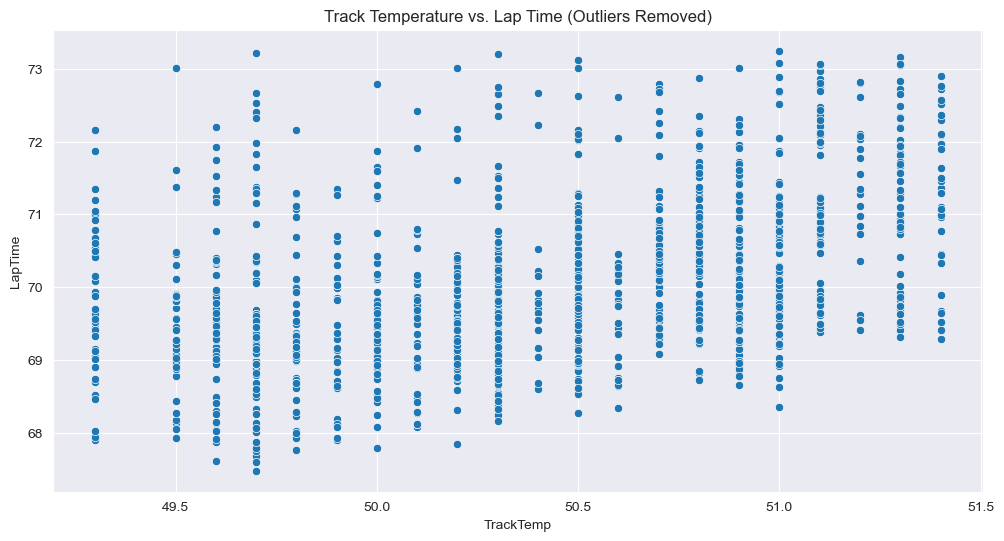

In [136]:

# Calculate Q1, Q3, and IQR
Q1 = df['LapTime'].quantile(0.25)
Q3 = df['LapTime'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds for outliers
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['LapTime'] < lower_bound) | (df['LapTime'] > upper_bound)]

#  Remove outliers from the DataFrame
df_no_outliers = df[(df['LapTime'] >= lower_bound) & (df['LapTime'] <= upper_bound)]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='TrackTemp', y='LapTime', data=df_no_outliers)
plt.title('Track Temperature vs. Lap Time (Outliers Removed)')
plt.show()


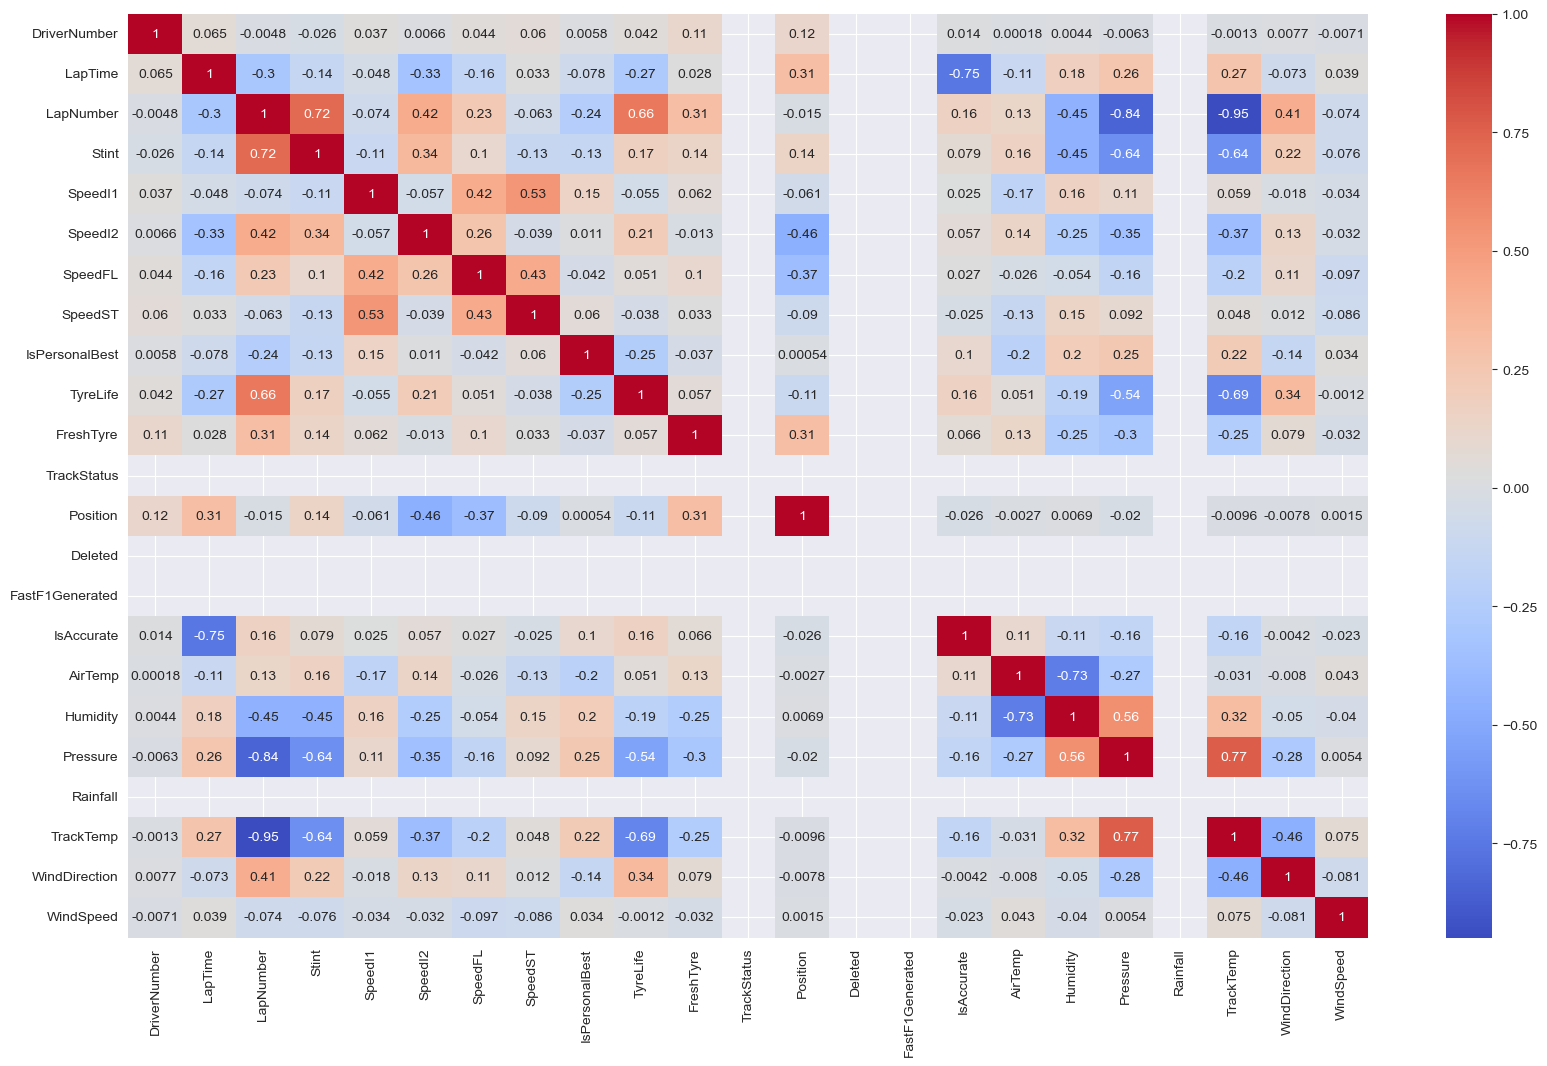

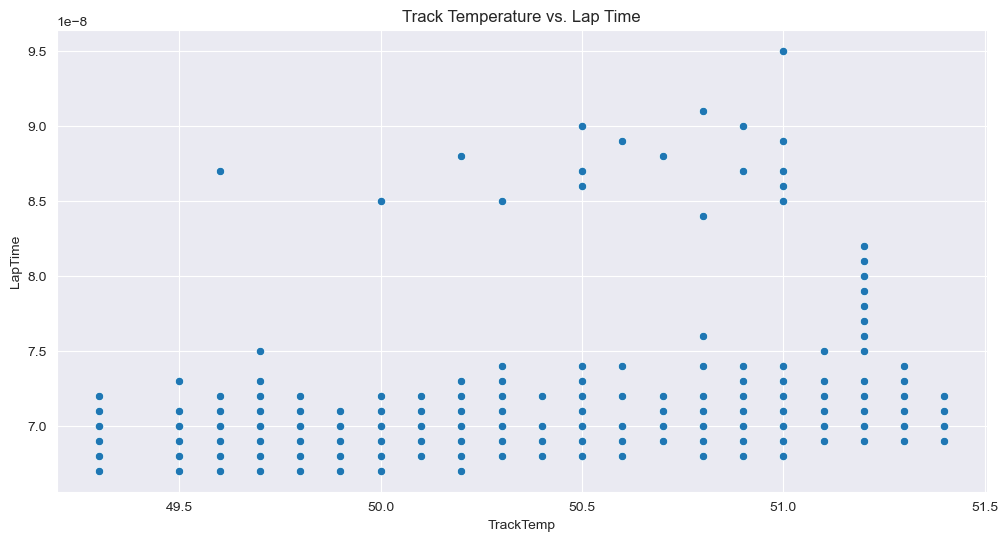

In [137]:
df['LapTime'] = pd.to_timedelta(df['LapTime'])

df['LapTime'] = df['LapTime'].dt.total_seconds()


corr_matrix = df.corr(numeric_only=True)

# Heatmap to visualize correlations
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Scatter plot for Track Temperature vs. Lap Time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TrackTemp', y='LapTime', data=df)
plt.title('Track Temperature vs. Lap Time')
plt.show()
